C:\Users\pedro\AppData\Local\Temp\ipykernel_15968\3254151197.py:16: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in all_files]


   ID_CLIENT CLERK_TYPE  PAYMENT_DAY APPLICATION_SUBMISSION_TYPE  \
0      50001          C            1                         Web   
1      50002          C           20                         Web   
2      50003          C           25                         Web   
3      50004          C           10                         Web   
4      50005          C           25                         Web   

   QUANT_ADDITIONAL_CARDS  POSTAL_ADDRESS_TYPE SEX  MARITAL_STATUS  \
0                     0.0                    1   F               1   
1                     0.0                    1   F               1   
2                     0.0                    1   M               1   
3                     0.0                    1   F               7   
4                     0.0                    1   F               1   

   QUANT_DEPENDANTS  EDUCATION_LEVEL  ... MATE_EDUCATION_LEVEL  \
0                 0                4  ...              3.02603   
1                 0                4  

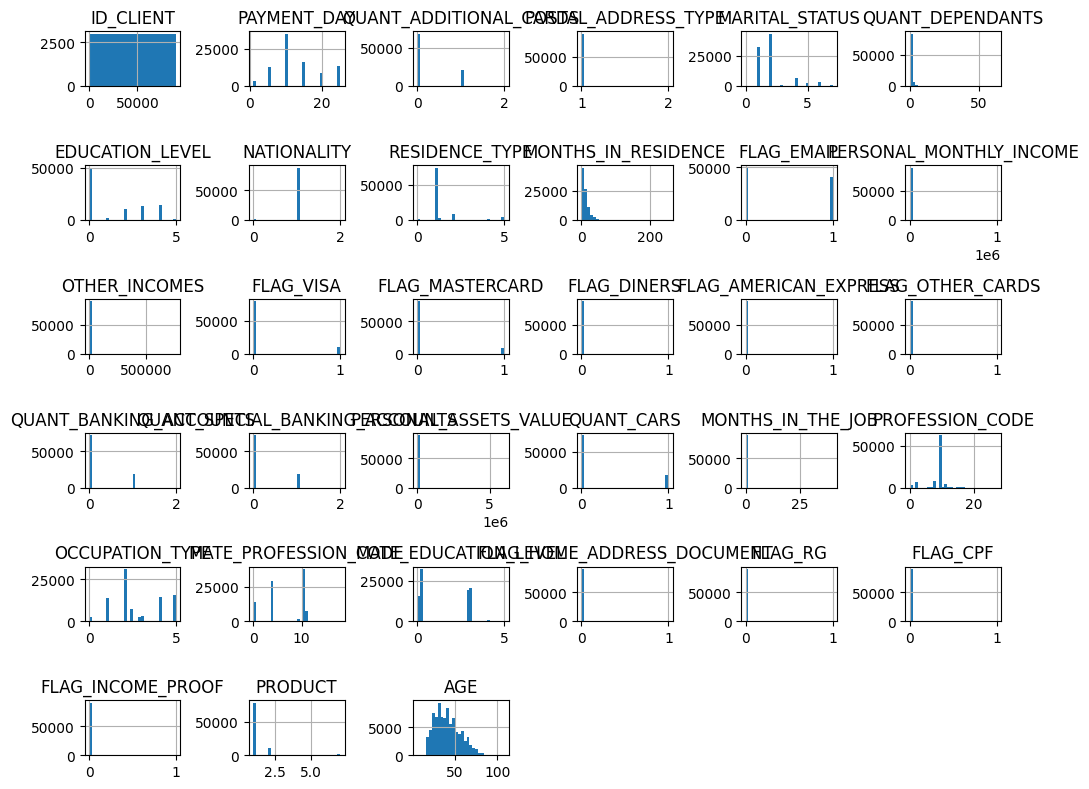

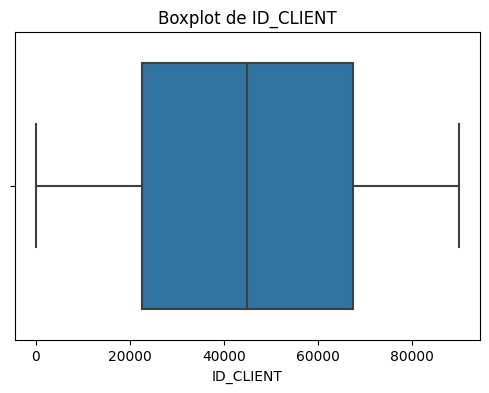

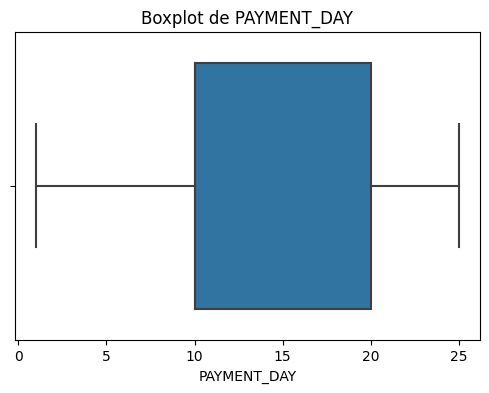

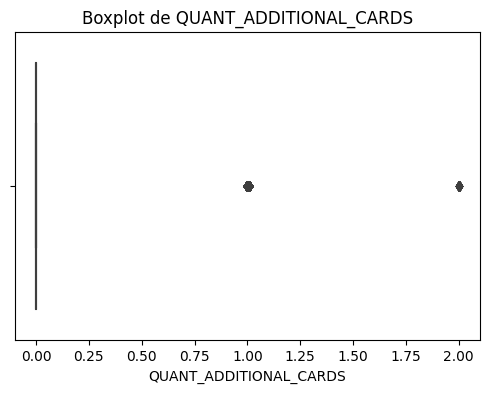

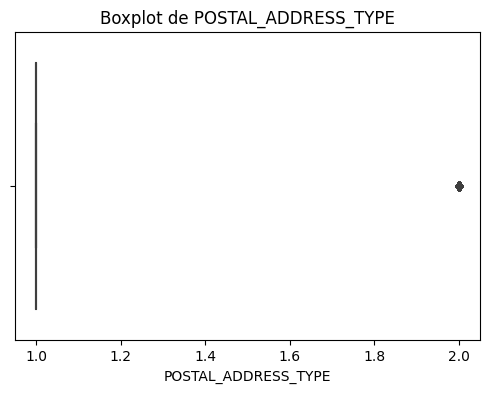

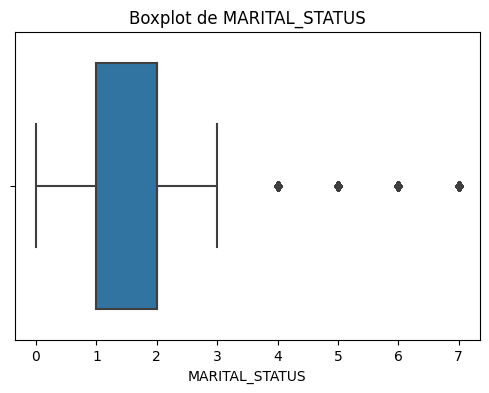

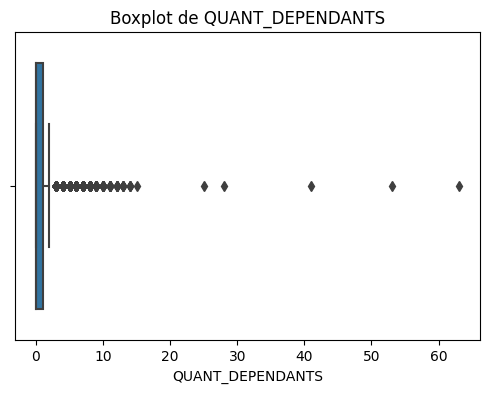

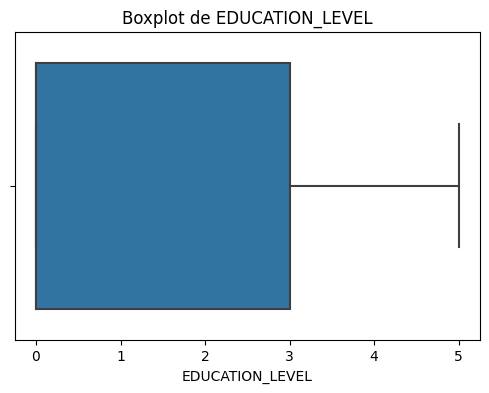

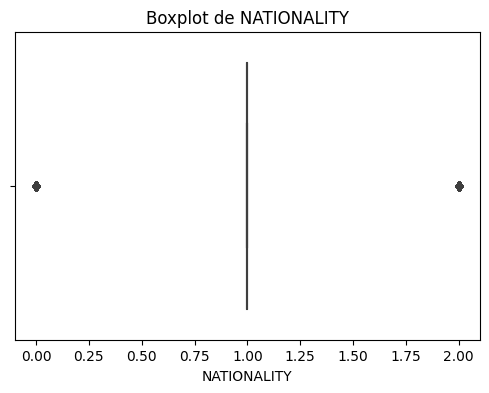

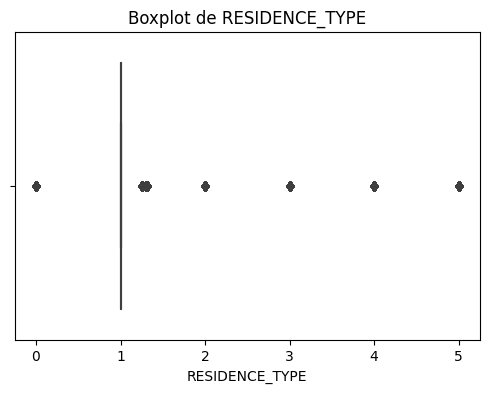

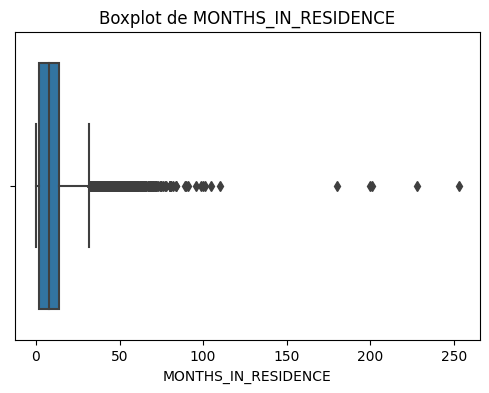

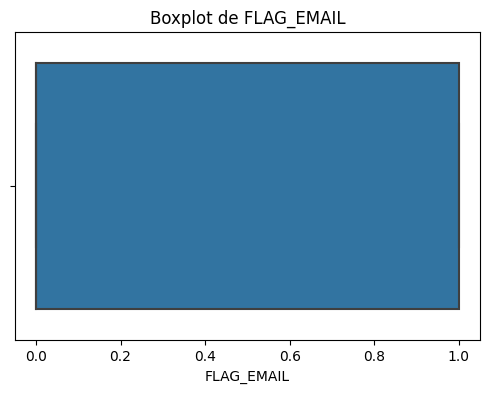

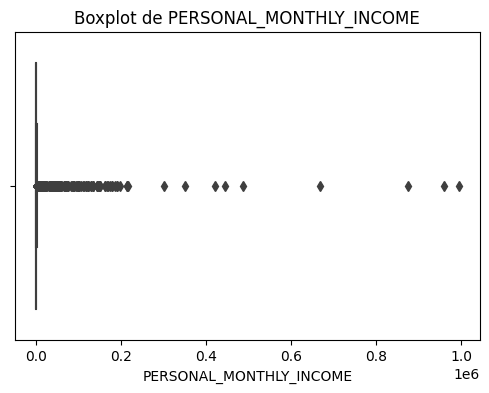

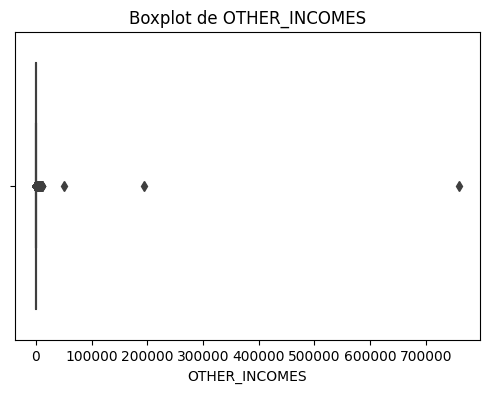

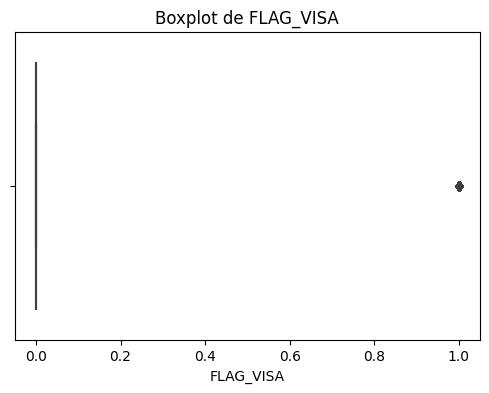

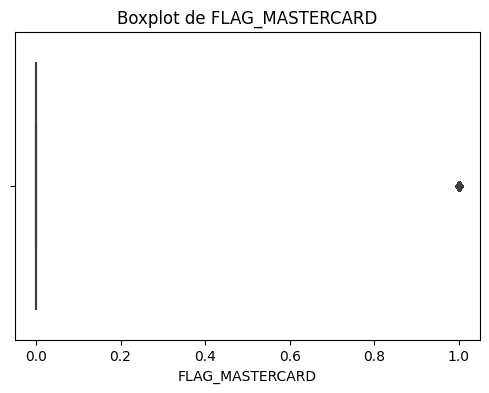

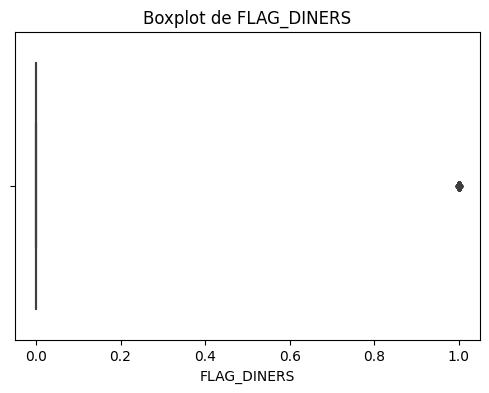

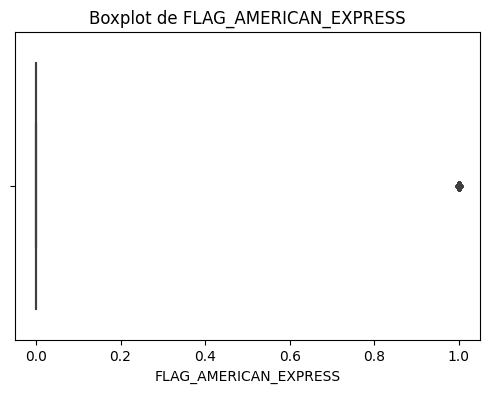

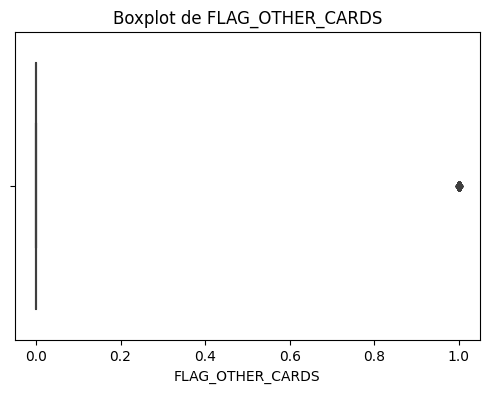

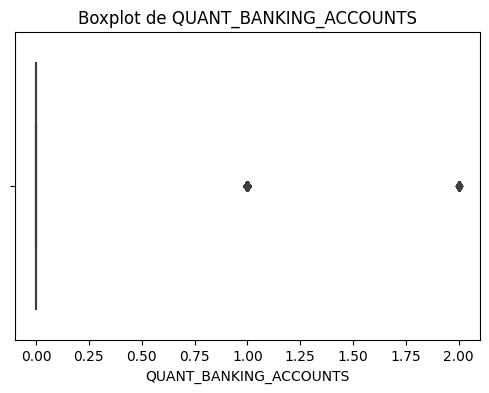

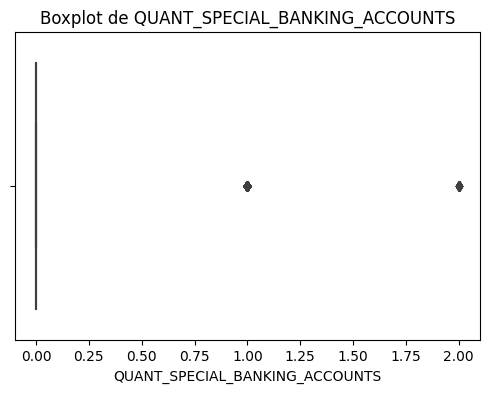

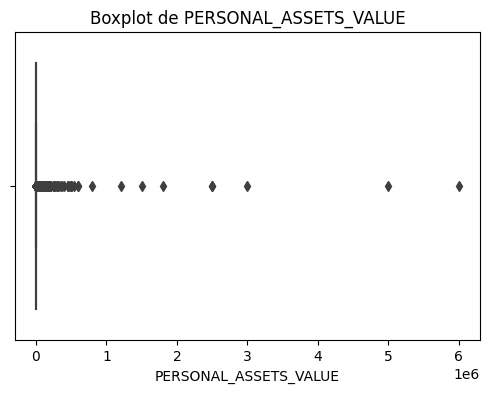

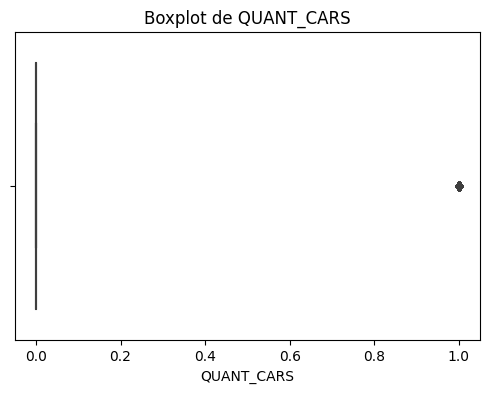

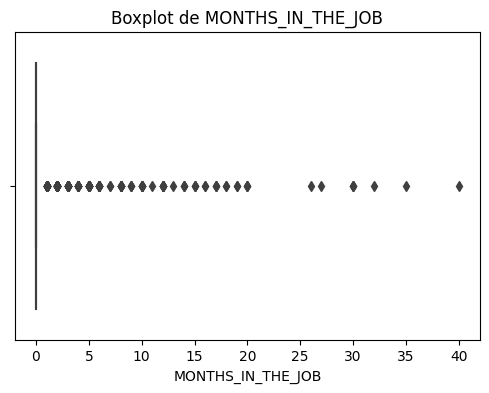

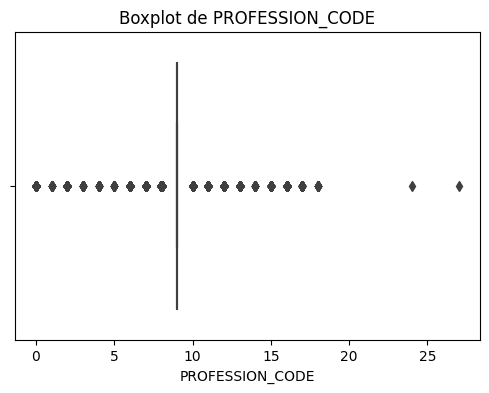

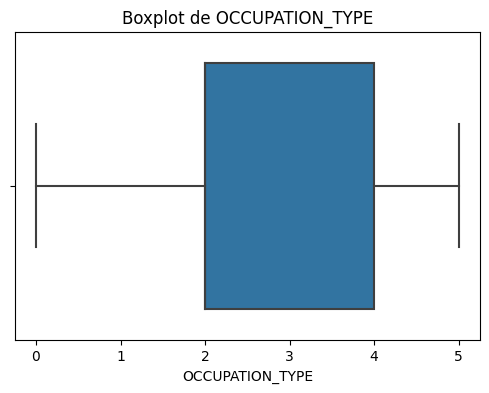

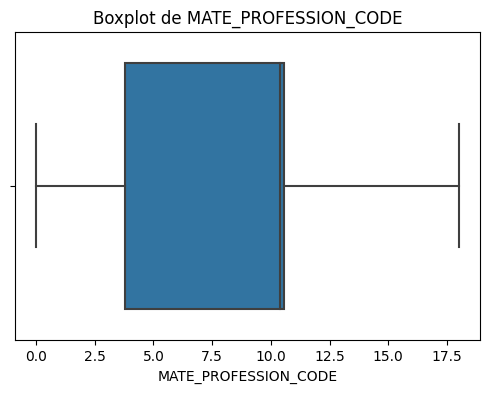

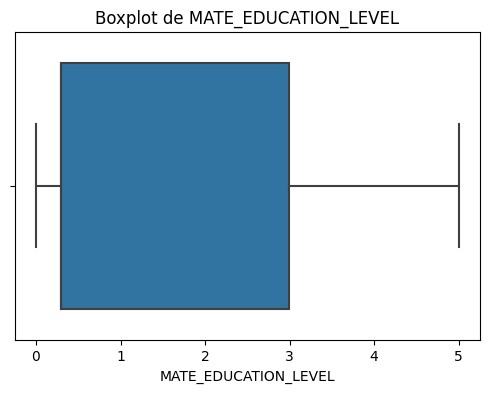

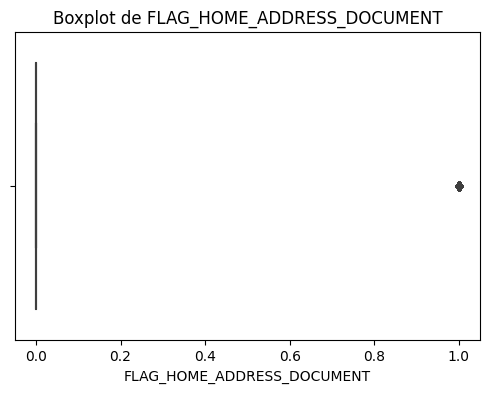

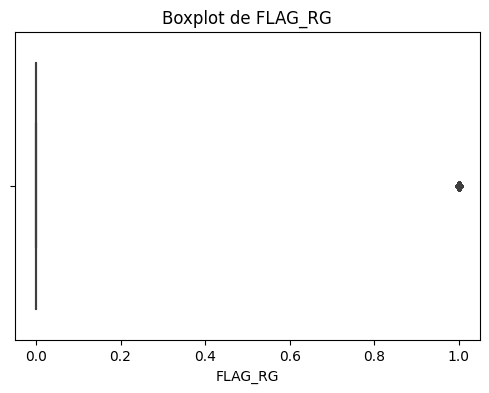

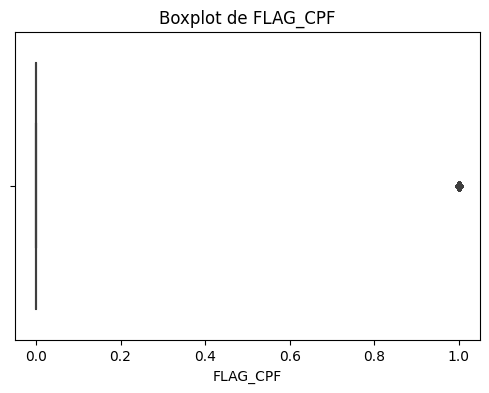

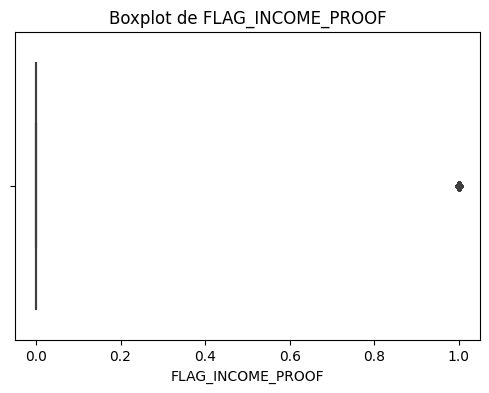

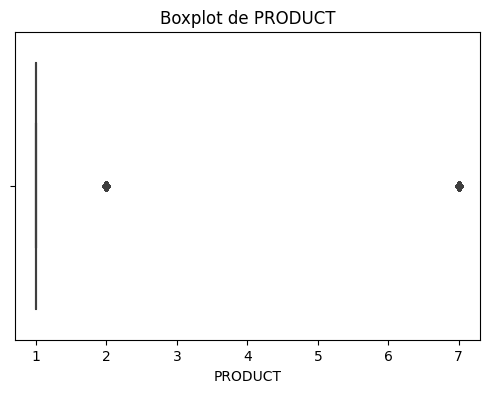

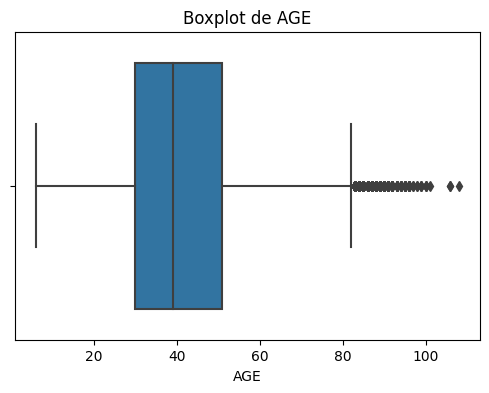

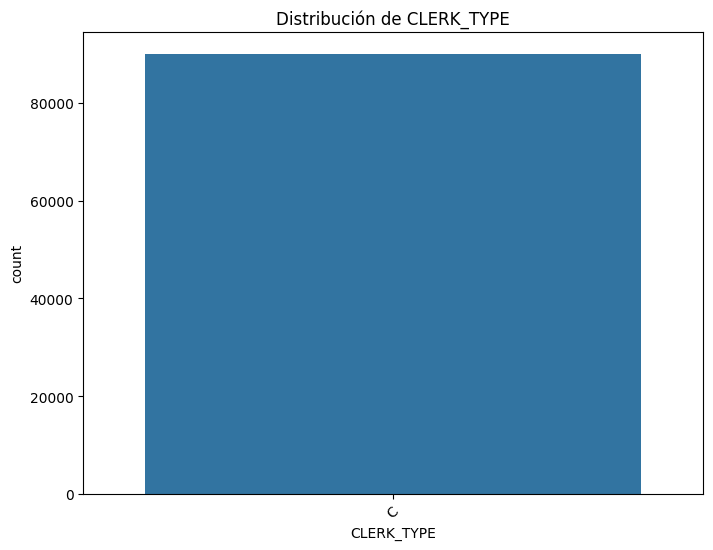

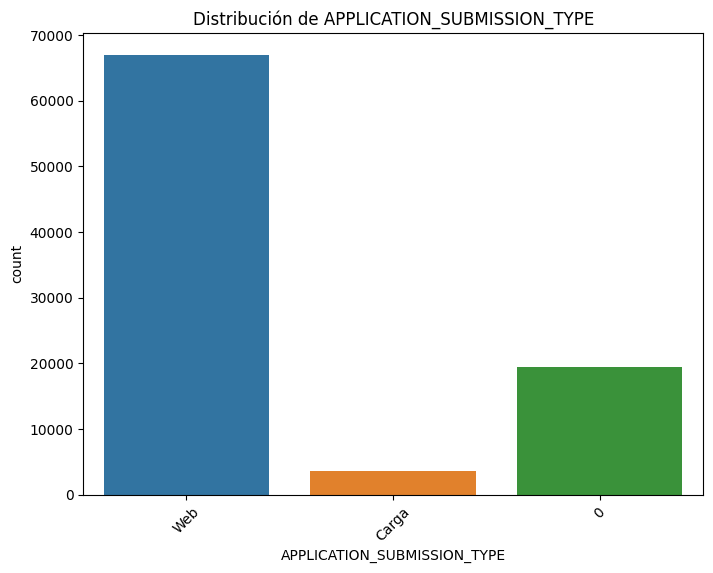

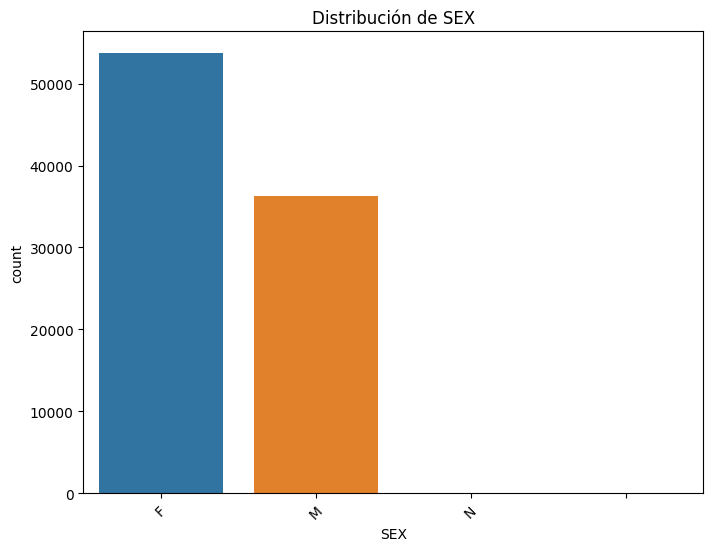

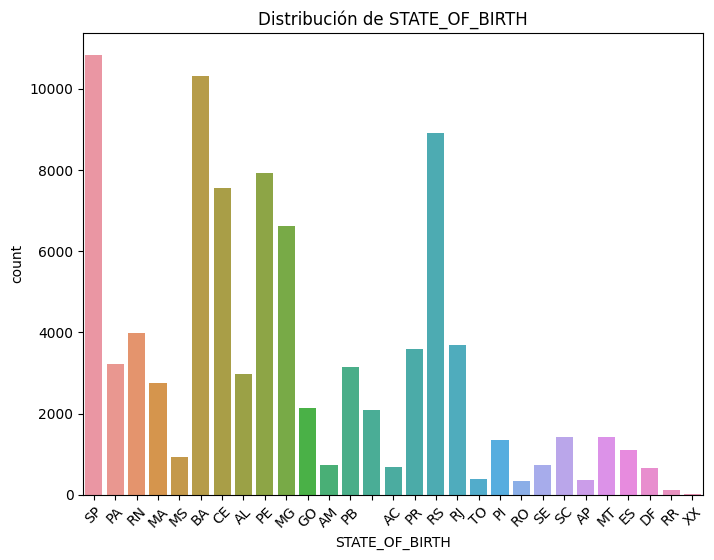

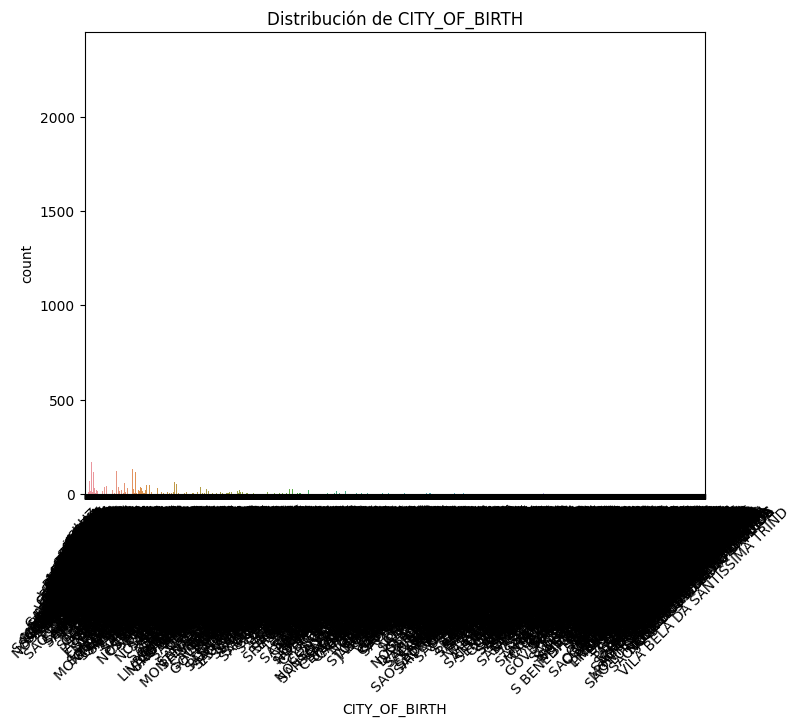

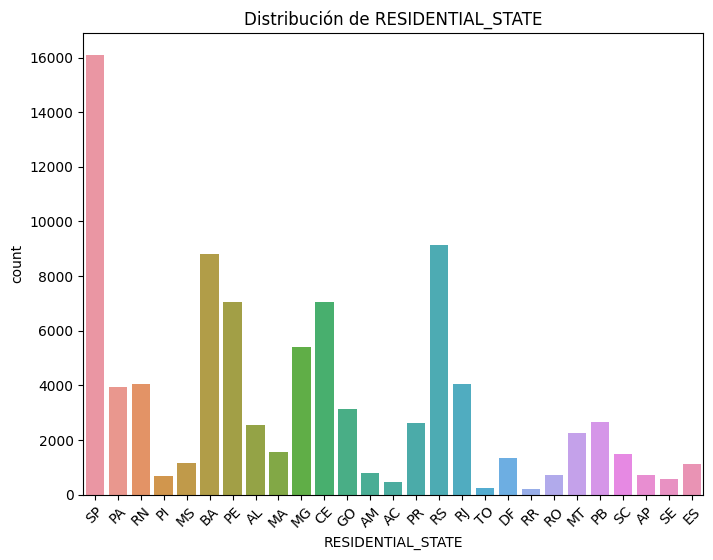

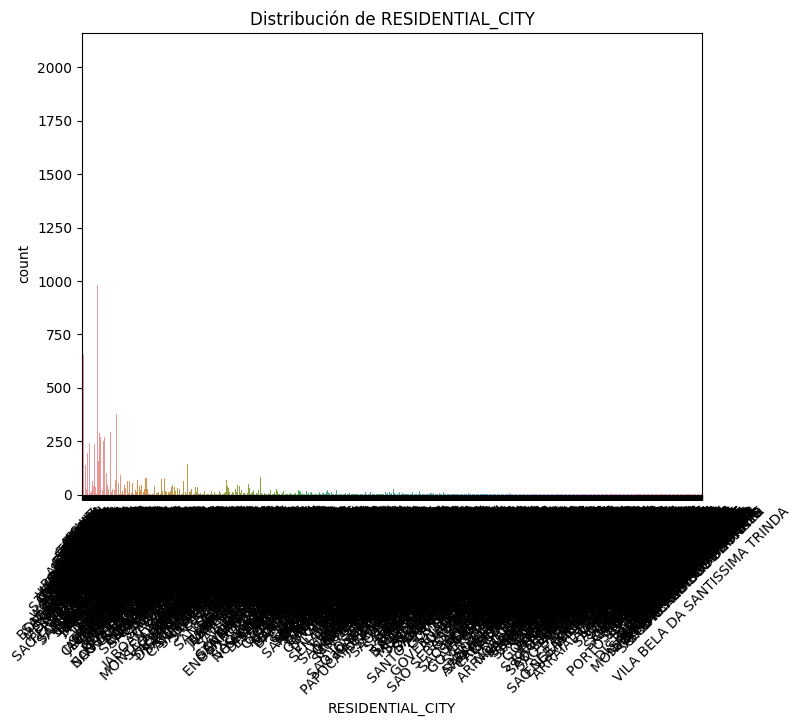

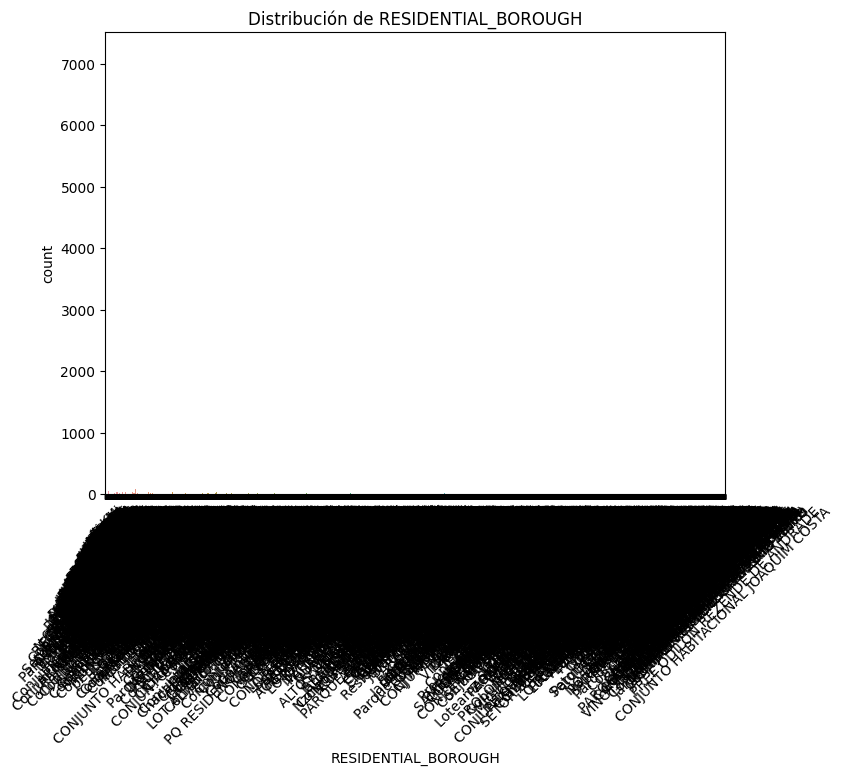

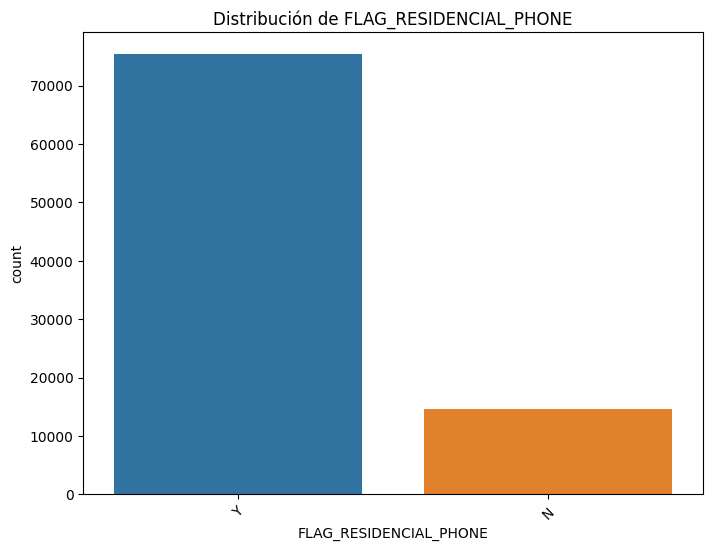

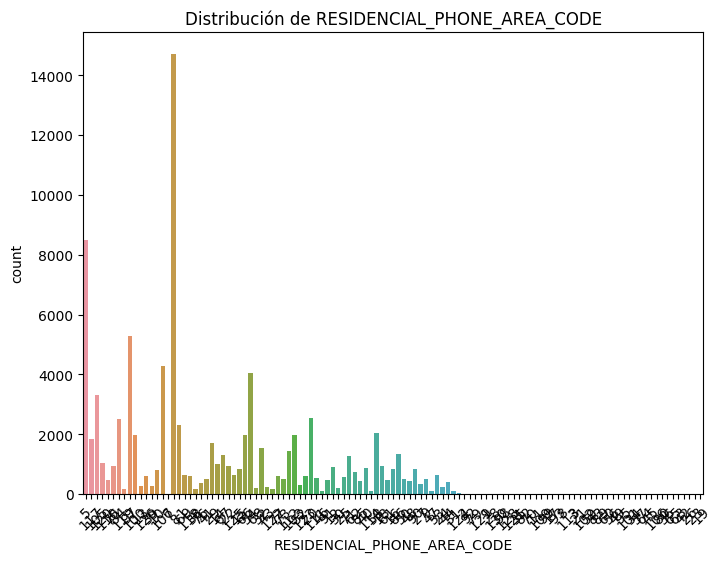

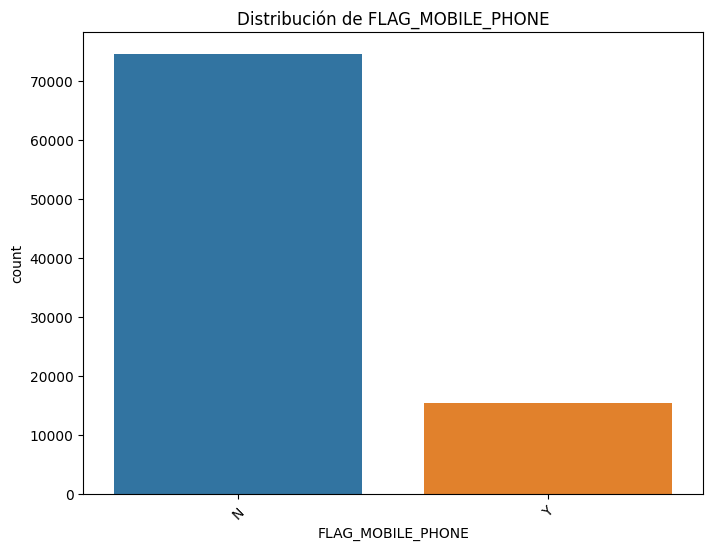

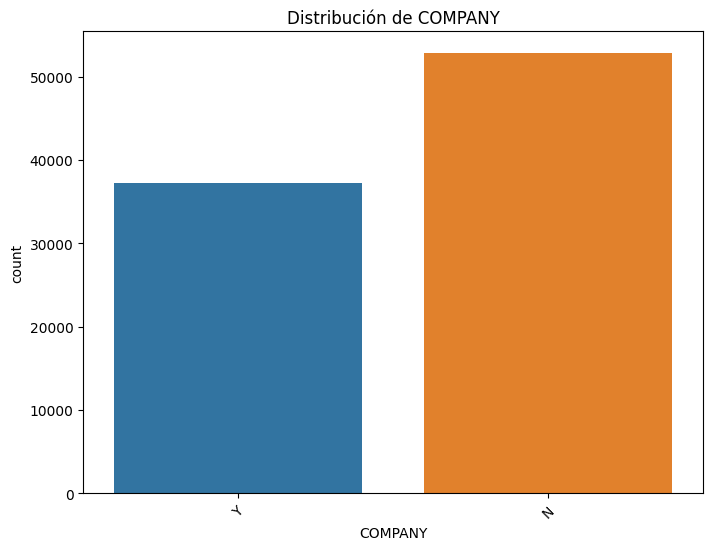

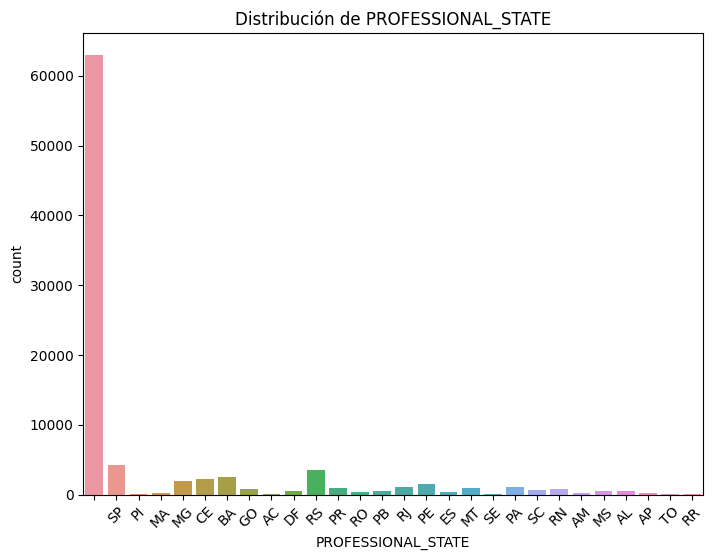

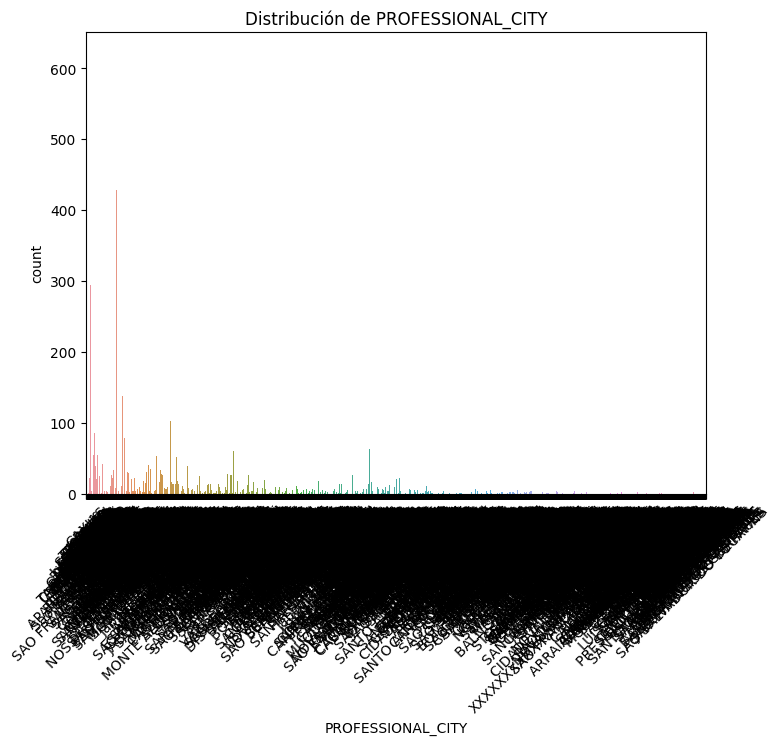

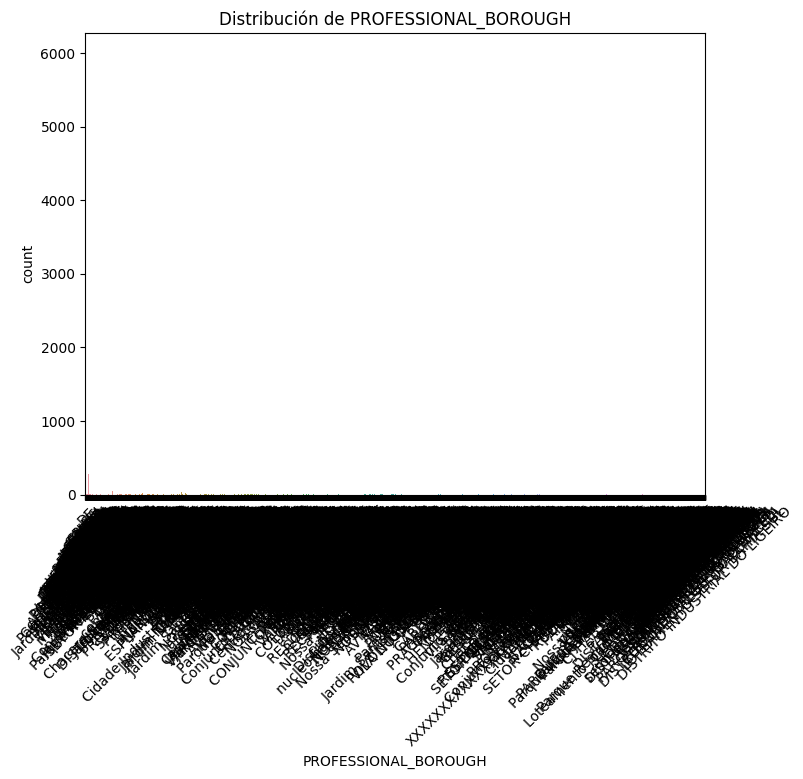

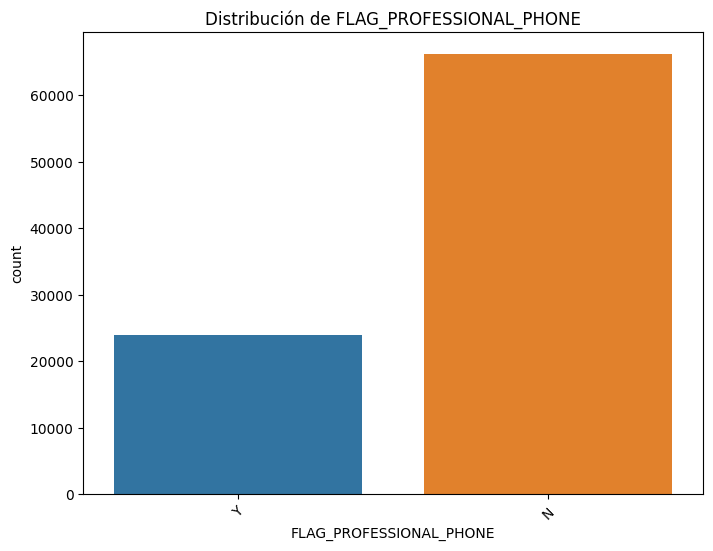

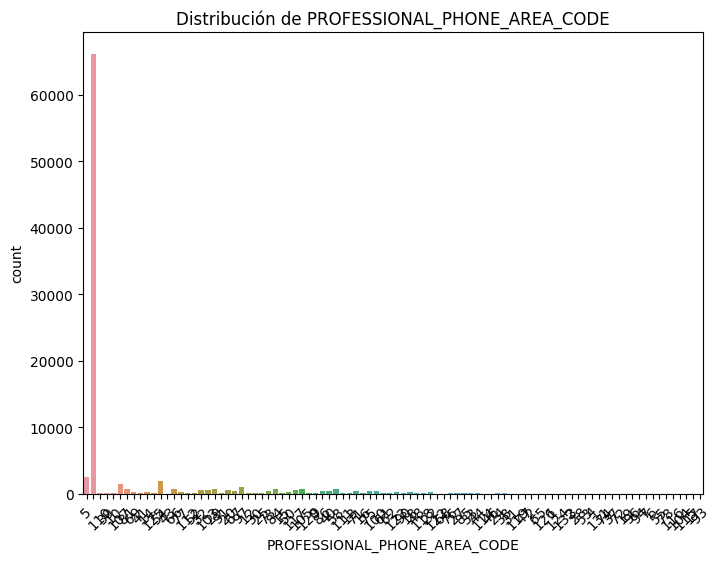

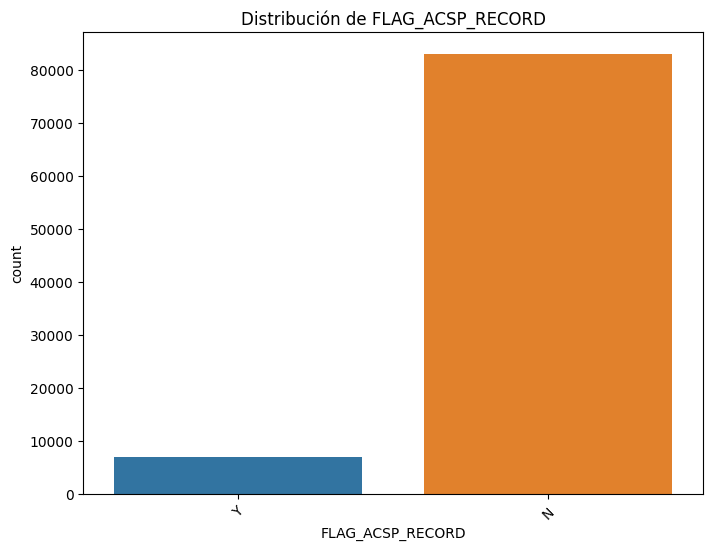

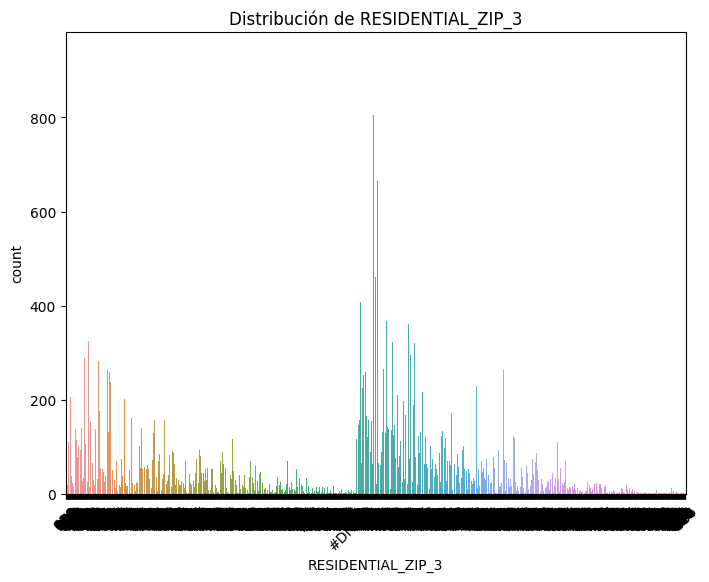

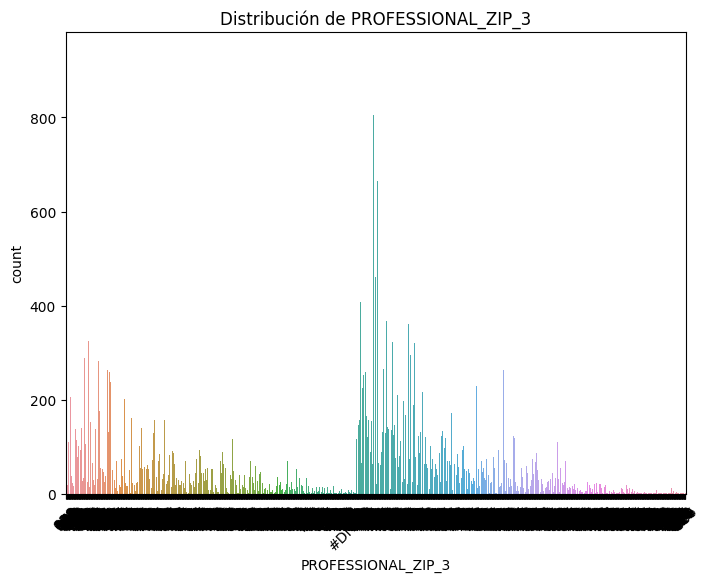

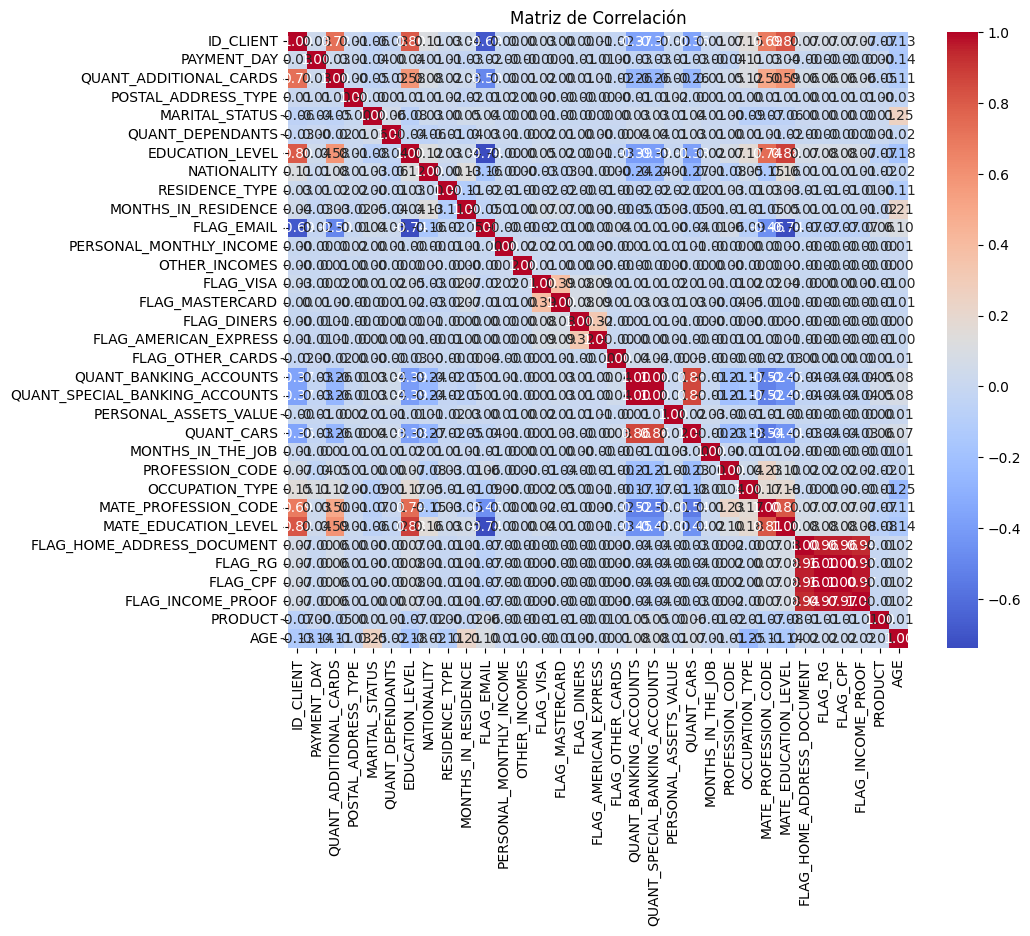

Índices de outliers: (array([    0,     3,     7, ..., 89995, 89997, 89997], dtype=int64), array([14,  4, 14, ..., 31,  8, 14], dtype=int64))


In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

# Definir la ruta de los archivos procesados
data_path = '../data/processed_data/'

# Leer todos los archivos CSV en la carpeta y concatenarlos en un solo DataFrame
all_files = [os.path.join(data_path, f) for f in os.listdir(data_path) if f.endswith('.csv')]

# Cargar y concatenar los datos
df_list = [pd.read_csv(file) for file in all_files]
df_final = pd.concat(df_list, ignore_index=True)

# Mostrar las primeras filas del DataFrame
print(df_final.head())

# 1. Obtener estadísticas descriptivas
print("Estadísticas descriptivas:")
print(df_final.describe())

# 2. Analizar la distribución de variables numéricas (histogramas y boxplots)
numeric_columns = df_final.select_dtypes(include=[np.number]).columns

# Histograma de variables numéricas
df_final[numeric_columns].hist(figsize=(10, 8), bins=30)
plt.tight_layout()
plt.show()

# Boxplot para cada variable numérica
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_final[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

# 3. Analizar la distribución de variables categóricas (gráficos de barras)
categorical_columns = df_final.select_dtypes(exclude=[np.number]).columns

# Gráfico de barras para cada variable categórica
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df_final[column])
    plt.title(f'Distribución de {column}')
    plt.xticks(rotation=45)
    plt.show()

# 4. Identificar correlaciones entre variables (matriz de correlación)
# Filtrar solo las columnas numéricas para evitar problemas con variables no numéricas
correlation_matrix = df_final[numeric_columns].corr()

# Heatmap de la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# 5. Identificar valores atípicos (outliers) en las variables numéricas
# Asegurarnos de seleccionar solo columnas numéricas
df_numeric = df_final[numeric_columns]

# Asegurarse de que no haya valores NaN o no numéricos
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

# Z-score para detectar outliers
z_scores = np.abs(stats.zscore(df_numeric, nan_policy='omit'))

# Identificar los outliers (z-score > 3)
outliers = (z_scores > 3)

# Mostrar los índices de los outliers
print("Índices de outliers:", np.where(outliers))